# Lab | Handling Data Imbalance in Classification Models

For this lab and in the next lessons we will build a model on customer churn binary classification problem. You will be using files_for_lab/Customer-Churn.csv file.

### Scenario

You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

### Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

1) Import the required libraries and modules that you would need.

2) Read that data into Python and call the dataframe churnData.

3) Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

4) Check for null values in the dataframe. Replace the null values.

5) Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:

    a) Scale the features either by using normalizer or a standard scaler.
    
    b) Split the data into a training set and a test set.
    
    c) Fit a logistic regression model on the training data.
    
    d) Check the accuracy on the test data.
    
Note: So far we have not balanced the data.

Managing imbalance in the dataset

6) Check for the imbalance.

7) Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.

8) Each time fit the model and see how the accuracy of the model is.

### Instructions

1) Import the required libraries and modules that you would need.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, Normalizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

### Instructions

2) Read that data into Python and call the dataframe churnData.

In [2]:
churnData = pd.read_csv("../lab-handling-data-imbalance-classification/files_for_lab/Customer-Churn.csv")
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


### Instructions

3) Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

In [3]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [4]:
churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"],errors="coerce")
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

### Instructions

4) Check for null values in the dataframe. Replace the null values.

In [5]:
churnData.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
No_charges = churnData[churnData["TotalCharges"].isna()]
No_charges

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,Yes,No,Yes,Yes,Yes,No,Two year,52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,Yes,Yes,Yes,No,Yes,Yes,Two year,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,Yes,Yes,Yes,Yes,Yes,No,Two year,56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,No,Yes,Yes,Yes,Yes,No,Two year,73.35,NaN,No


In [7]:
No_tenure = churnData[churnData["tenure"]==0]
No_tenure

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,Yes,No,Yes,Yes,Yes,No,Two year,52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,Yes,Yes,Yes,No,Yes,Yes,Two year,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,Yes,Yes,Yes,Yes,Yes,No,Two year,56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,No,Yes,Yes,Yes,Yes,No,Two year,73.35,NaN,No


In [8]:
# Are the customers with tenure = 0 the ones missing any total charges?

No_tenure.index.to_list() == No_charges.index.to_list()

True

In [9]:
# The customers that did not complete any tenure have never been charged, therefore missing values should be 0

churnData.fillna(0, inplace=True)

### Instructions

5) Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:

In [10]:
X = churnData[["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges"]]
y = churnData["Churn"]
X

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65
...,...,...,...,...
7038,24,0,84.80,1990.50
7039,72,0,103.20,7362.90
7040,11,0,29.60,346.45
7041,4,1,74.40,306.60


### Instructions

    b) Split the data into a training set and a test set.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Instructions

    a) Scale the features either by using normalizer or a standard scaler.

In [12]:
# StandardScaler: use it only after the train-test split!

STDscaler = StandardScaler().fit(X_train) # initialize StandardScaler and fit TRAIN data to compute mean and std

In [13]:
# Transform TRAIN data with the scaler

X_train_STDscaled = pd.DataFrame( # convert np array returned by scaler.transform() into a pd dataframe
    data=STDscaler.transform(X_train), # use scaler to standarized numerical values by centering and scaling
    index=X_train.index, columns=X_train.columns) # set index and column names of the new dataframe
X_train_STDscaled.sample(5)

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
1633,-1.284263,-0.436831,-0.696628,-0.990264
4694,-0.793997,-0.436831,-1.491301,-0.898363
6844,-0.140309,-0.436831,0.824697,0.148498
2076,-0.753141,-0.436831,-0.188967,-0.668457
4243,0.309101,-0.436831,-0.023064,0.076416


### Instructions

    c) Fit a logistic regression model on the training data.

In [14]:
classification_imb = LogisticRegression(random_state=42, max_iter=1000).fit(X_train_STDscaled, y_train)

### Instructions

    d) Check the accuracy on the test data.

Score = 0.272


Yes    2113
dtype: int64

No     1539
Yes     574
Name: Churn, dtype: int64

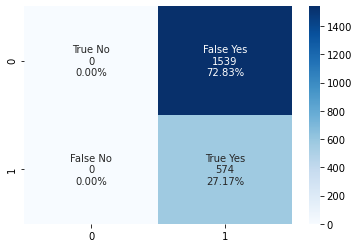

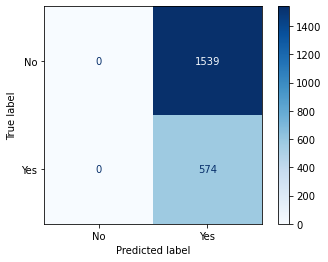

              precision    recall  f1-score   support

          No       0.00      0.00      0.00      1539
         Yes       0.27      1.00      0.43       574

    accuracy                           0.27      2113
   macro avg       0.14      0.50      0.21      2113
weighted avg       0.07      0.27      0.12      2113



In [15]:
#Score and predictions
print("Score =",round(classification_imb.score(X_test, y_test), 3))
predictions_imb = classification_imb.predict(X_test)
display(pd.Series(predictions_imb).value_counts())
display(y_test.value_counts())

#Confusion matrices
confusion_matrix(y_test, predictions_imb)
cf_matrix_imb = confusion_matrix(y_test, predictions_imb)
group_names = ['True No', 'False Yes', 'False No', 'True Yes']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_imb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_imb.flatten()/np.sum(cf_matrix_imb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2) #Modify this accordingly
sns.heatmap(cf_matrix_imb, annot=labels, fmt='', cmap='Blues')

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
plot_confusion_matrix(classification_imb, X_test, y_test, cmap='Blues')
plt.show()
print(classification_report(y_test, predictions_imb))

In [16]:
pd.DataFrame(classification_imb.coef_,columns=X.columns)

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,-1.508245,0.223031,0.838419,0.236719


### Instructions

6) Check for the imbalance.

No     5174
Yes    1869
Name: Churn, dtype: int64
The NO:YES ratio is 2.77


<AxesSubplot:xlabel='Churn', ylabel='count'>

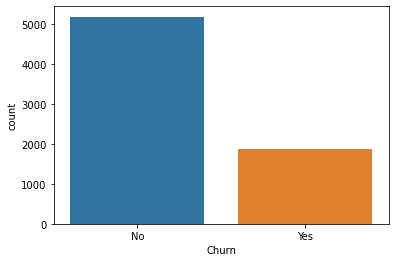

In [17]:
balance_1=y.value_counts() #value counts of the target directly from the dataset
print(balance_1)
print("The NO:YES ratio is",round(balance_1.array[0]/balance_1.array[1], 2))

sns.countplot(y)

### Instructions

7) Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.

In [18]:
# TOMEK Links undersampling:
# First, we apply an undersampling technique to the X/y train dataframes from the X/y train/test split. 
# This will serve to "soften" the clusters of each category.

from imblearn.under_sampling import TomekLinks
tl = TomekLinks(sampling_strategy='not minority') # initialize Tomek Links

#Apply undersampling to X_train and y_train
X_train_tl_1, y_train_tl_1 = tl.fit_resample(X_train_STDscaled, y_train)  #X_train and y_train after TL 1
display(y_train_tl_1.value_counts())
balance_2=y_train_tl_1.value_counts() #value counts of the target after TL 1
print("The NO:YES ratio is",round(balance_2.array[0]/balance_2.array[1], 2))

No     3264
Yes    1295
Name: Churn, dtype: int64

The NO:YES ratio is 2.52


In [19]:
# The imbalancing has improved, but it is not balanced enough yet. We next apply oversampling with SMOTE:

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train_tl_1, y_train_tl_1)  #X_train and y_train after SMOTE
display(y_train_sm.value_counts())
balance_3=y_train_sm.value_counts() #value counts of the target after SMOTE
print("The NO:YES ratio is",round(balance_3.array[0]/balance_3.array[1], 2))

No     3264
Yes    3264
Name: Churn, dtype: int64

The NO:YES ratio is 1.0


In [20]:
# As expected, the oversampling has completely balanced the values in the y_train dataset. However, this is not real: 
# many "fake" values have been added, and this could generate artificial predictions from our model.
# TOMEK Links polishing: Apply undersampling again to X_train_sm and y_train_sm

X_train_tl_2, y_train_tl_2 = tl.fit_resample(X_train_sm, y_train_sm)  #X_train and y_train after TL 2
display(y_train_tl_2.value_counts())
balance_4=y_train_tl_2.value_counts() #value counts of the target after TL 2
print("The NO:YES ratio is",round(balance_4.array[0]/balance_4.array[1], 2))

No     3264
Yes    3114
Name: Churn, dtype: int64

The NO:YES ratio is 1.05


### Instructions

8) Each time fit the model and see how the accuracy of the model is.

In [21]:
# First TOMEK Links

classification_tl_1 = LogisticRegression(random_state=42, max_iter=1000).fit(X_train_tl_1, y_train_tl_1)

Score = 0.272


Yes    2113
dtype: int64

No     1539
Yes     574
Name: Churn, dtype: int64

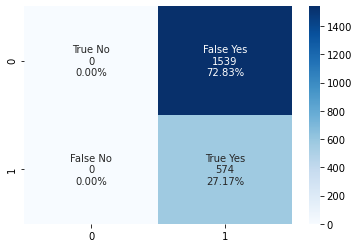

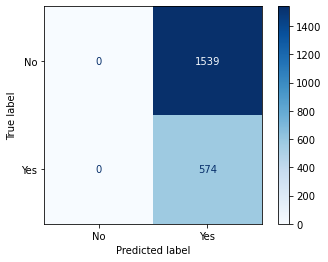

              precision    recall  f1-score   support

          No       0.00      0.00      0.00      1539
         Yes       0.27      1.00      0.43       574

    accuracy                           0.27      2113
   macro avg       0.14      0.50      0.21      2113
weighted avg       0.07      0.27      0.12      2113



In [22]:
#Score and predictions
print("Score =",round(classification_tl_1.score(X_test, y_test), 3))
predictions_tl_1 = classification_tl_1.predict(X_test)
display(pd.Series(predictions_tl_1).value_counts())
display(y_test.value_counts())

#Confusion matrices
confusion_matrix(y_test, predictions_tl_1)
cf_matrix_tl_1 = confusion_matrix(y_test, predictions_tl_1)
group_names = ['True No', 'False Yes', 'False No', 'True Yes']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_tl_1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_tl_1.flatten()/np.sum(cf_matrix_tl_1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2) #Modify this accordingly
sns.heatmap(cf_matrix_tl_1, annot=labels, fmt='', cmap='Blues')

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
plot_confusion_matrix(classification_tl_1, X_test, y_test, cmap='Blues')
plt.show()
print(classification_report(y_test, predictions_tl_1))

In [23]:
# SMOTE

classification_sm = LogisticRegression(random_state=42, max_iter=1000).fit(X_train_sm, y_train_sm)

Score = 0.505


Yes    1588
No      525
dtype: int64

No     1539
Yes     574
Name: Churn, dtype: int64

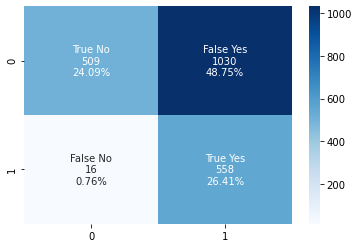

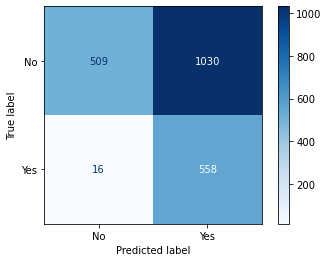

              precision    recall  f1-score   support

          No       0.97      0.33      0.49      1539
         Yes       0.35      0.97      0.52       574

    accuracy                           0.50      2113
   macro avg       0.66      0.65      0.50      2113
weighted avg       0.80      0.50      0.50      2113



In [24]:
#Score and predictions
print("Score =",round(classification_sm.score(X_test, y_test), 3))
predictions_sm = classification_sm.predict(X_test)
display(pd.Series(predictions_sm).value_counts())
display(y_test.value_counts())

#Confusion matrices
confusion_matrix(y_test, predictions_sm)
cf_matrix_sm = confusion_matrix(y_test, predictions_sm)
group_names = ['True No', 'False Yes', 'False No', 'True Yes']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_sm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_sm.flatten()/np.sum(cf_matrix_sm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2) #Modify this accordingly
sns.heatmap(cf_matrix_sm, annot=labels, fmt='', cmap='Blues')

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
plot_confusion_matrix(classification_sm, X_test, y_test, cmap='Blues')
plt.show()
print(classification_report(y_test, predictions_sm))

In [25]:
# Second TOMEK Links

classification_tl_2 = LogisticRegression(random_state=42, max_iter=1000).fit(X_train_tl_2, y_train_tl_2)

Score = 0.272


Yes    2113
dtype: int64

No     1539
Yes     574
Name: Churn, dtype: int64

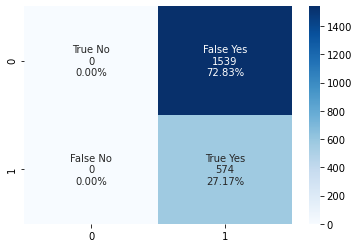

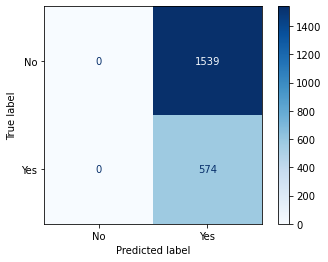

              precision    recall  f1-score   support

          No       0.00      0.00      0.00      1539
         Yes       0.27      1.00      0.43       574

    accuracy                           0.27      2113
   macro avg       0.14      0.50      0.21      2113
weighted avg       0.07      0.27      0.12      2113



In [26]:
#Score and predictions
print("Score =",round(classification_tl_2.score(X_test, y_test), 3))
predictions_tl_2 = classification_tl_2.predict(X_test)
display(pd.Series(predictions_tl_2).value_counts())
display(y_test.value_counts())

#Confusion matrices
confusion_matrix(y_test, predictions_tl_2)
cf_matrix_tl_2 = confusion_matrix(y_test, predictions_tl_2)
group_names = ['True No', 'False Yes', 'False No', 'True Yes']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_tl_2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_tl_2.flatten()/np.sum(cf_matrix_tl_2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2) #Modify this accordingly
sns.heatmap(cf_matrix_tl_2, annot=labels, fmt='', cmap='Blues')

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
plot_confusion_matrix(classification_tl_2, X_test, y_test, cmap='Blues')
plt.show()
print(classification_report(y_test, predictions_tl_2))

In [ ]:
# It is very weird that predictions are the same for all samples but SMOTE.
# I must be making some mistake, but I can't find it. ASK TA